<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-04-tree-based-models-decision-tree-c45-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.4 C4.5 Model

The **C4.5 model** is a decision tree algorithm used for classification tasks in machine learning, developed by Ross Quinlan as an improvement over his earlier ID3 algorithm. It builds a decision tree from a dataset by recursively splitting the input space into regions based on feature values and making a decision based on the majority class in that region. C4.5 is widely used due to its ability to handle both categorical and continuous data, deal with missing values, and produce interpretable models.


## Overview of C4.5

C4.5 is a supervised learning algorithm that constructs a decision tree based on the concept of information gain. It uses the `gain ratio` to select the best feature for splitting the data at each node, which helps to reduce bias towards features with many values. C4.5 can handle both categorical and continuous features, manage missing values, and apply pruning techniques to avoid overfitting. The algorithm is particularly effective for classification tasks, where the goal is to predict a categorical outcome based on input features. C4.5 has been widely used in various domains, including medical diagnosis, credit scoring, and customer segmentation.

### Key Features of C4.5

1.  `Handling Continuous Attributes`: C4.5 can process continuous data by selecting optimal thresholds to split numerical features into discrete intervals.
2.  `Handling Missing Values`: It manages missing data by using probabilistic methods to assign instances to branches.
3.  `Gain Ratio`: Instead of using information gain (as in ID3), C4.5 uses the gain ratio to mitigate bias toward attributes with many values.
4.  `Pruning`: Post-pruning is applied to reduce overfitting by removing branches that do not significantly improve accuracy.
5.  `Rule Derivation`: C4.5 can convert decision trees into sets of if-then rules for easier interpretation.
6.  `Handling Imbalanced Data`: It adjusts for class imbalances through weighting mechanisms.

### How C4.5 Works

C4.5 constructs a decision tree by recursively selecting the best attribute to split the data, based on the gain ratio criterion, and continues until a stopping condition is met (e.g., all instances belong to one class or a predefined depth is reached). After building the tree, it prunes unnecessary branches to improve generalization.

1.  Calculate Information Entropy

  Entropy measures the impurity of a dataset. For a dataset $S$ with $c$ classes, entropy is:

$$ \text{Entropy}(S) = -\sum_{i=1}^c p_i \log_2(p_i) $$

where $p_i$ is the proportion of instances belonging to class $i$.

2.  Calculate Information Gain

  Information gain measures the reduction in entropy after splitting on an attribute $A$:

$$ \text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v) $$

where $S_v$ is the subset of $S$ for which attribute $A$ has value $v$, and $|S_v| / |S|$ is the proportion of instances with value $v$.

3.  Calculate Split Information

  Split information accounts for the number and size of branches created by splitting on attribute $A$:

$$ \text{SplitInfo}(S, A) = -\sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \log_2\left(\frac{|S_v|}{|S|}\right) $$

4.  Calculate Gain Ratio

  The gain ratio normalizes information gain by split information to reduce bias:

$$ \text{GainRatio}(S, A) = \frac{\text{Gain}(S, A)}{\text{SplitInfo}(S, A)} $$

The attribute with the highest gain ratio is selected for splitting.

5.  Handle Continuous Attributes

  For continuous attributes, C4.5 evaluates possible thresholds by sorting values and testing splits between consecutive values. The threshold yielding the highest gain ratio is chosen.

6.  Handle Missing Values

   When an instance has a missing value for the splitting attribute, C4.5 assigns it to all branches with probabilities proportional to the number of instances in each branch.

7.  Recursive Splitting

  The dataset is split based on the selected attribute, and the process repeats for each subset until a stopping criterion is met (e.g., all instances in a node belong to one class, or a minimum node size is reached).

8.  Pruning

  After building the tree, C4.5 applies reduced error pruning or cost-complexity pruning to remove branches that do not improve classification accuracy on a validation set. This reduces overfitting.

9.  Convert to Rules (Optional)

  The tree can be converted into a set of if-then rules by tracing paths from the root to each leaf.

### Advantages of C4.5

-   `Interpretable`: The decision tree is easy to understand and visualize.
-   `Handles Mixed Data`: Works with both categorical and continuous features.
-   `Robust to Missing Data`: Can handle incomplete datasets.
-   `Reduces Overfitting`: Pruning improves generalization.
-   `Efficient`: Scales reasonably well for moderately sized datasets.

### Limitations

-   `Bias Toward Splits`: The gain ratio can still favor certain splits, leading to suboptimal trees.
-   `Overfitting Risk`: Without proper pruning, large trees can overfit noisy data.
-   `Scalability`: May struggle with very large datasets or high-dimensional data compared to modern algorithms like gradient boosting.
-   `Instability`: Small changes in the data can lead to significantly different trees.

### Applications

C4.5 is used in various domains, such as:

-   `Medical Diagnosis`: Classifying patients based on symptoms and test results.
-   `Credit Scoring`: Determining loan eligibility based on applicant data.
-   `Customer Segmentation`: Categorizing customers for marketing purposes.

## Setup R in Python Runtype

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## C4.5 Model from Scratch in R

Implementing the C4.5 decision tree algorithm from scratch in R without using external packages requires coding the core components: calculating entropy, information gain, and gain ratio; handling categorical and continuous features; building the tree recursively; and implementing pruning. Below is a simplified implementation that focuses on the core logic of C4.5, including handling categorical features and basic pruning. For simplicity, this implementation assumes no missing values and focuses on categorical features, but it includes comments on extending to continuous features.

### Function to Calculate Entropy and Information Gain


1. `entropy()` : Computes entropy using -$\sum p_i \log_2(p_i)$$, where $p_i$ is class proportion. Adds `1e-10` to avoid $\log_2(0)$.

2. `info_gain()`:

   - Calculates dataset entropy.
     - For each unique feature value:
       - Computes subset proportion and entropy.
       - Sums weighted entropy and split info: -$\sum \text{proportion} \log_2(\text{proportion})$.
     - Computes gain: $\text{total_entropy} - \text{weighted_entropy}$.
     - Returns gain ratio: $\text{gain} / \text{split_info}$ (0 if `split_info` is 0).

In [3]:
%%R
# Function to calculate entropy of a dataset
entropy <- function(class_vector) {
  probs <- table(class_vector) / length(class_vector)
  -sum(probs * log2(probs + 1e-10))  # Add small constant to avoid log(0)
}

# Function to calculate information gain
info_gain <- function(data, feature, class_col) {
  total_entropy <- entropy(data[[class_col]])
  feature_values <- unique(data[[feature]])

  weighted_entropy <- 0
  split_info <- 0
  total_instances <- nrow(data)

  for (val in feature_values) {
    subset <- data[data[[feature]] == val, ]
    proportion <- nrow(subset) / total_instances
    weighted_entropy <- weighted_entropy + proportion * entropy(subset[[class_col]])
    split_info <- split_info - proportion * log2(proportion + 1e-10)
  }

  gain <- total_entropy - weighted_entropy
  if (split_info == 0) return(0)  # Avoid division by zero
  gain_ratio <- gain / split_info
  return(gain_ratio)
}

### Fuctions to Build the Decision Tree

Builds a decision tree using gain ratio, predicts classes, and prunes to reduce overfitting.

1. `best_feature`: Computes gain ratio for each feature, returns the best feature and its gain.

2. `build_tree`:  Returns majority class if data < `min_split` or single-class. Selects best feature, splits data, and recursively builds subtrees.

3. `predict_tree`: Returns leaf class or majority class if no child node. Recursively predicts using child nodes.

4. `prune_tree`: ecursively prunes children. Replaces subtree with majority class if accuracy improves or equals.

In [4]:
%%R
# Function to find the best feature to split on
best_feature <- function(data, features, class_col) {
  gains <- sapply(features, function(f) info_gain(data, f, class_col))
  best_idx <- which.max(gains)
  list(feature = features[best_idx], gain = gains[best_idx])
}

# Function to build the decision tree recursively
build_tree <- function(data, features, class_col, min_split = 2) {
  # Base cases
  if (nrow(data) < min_split) {
    return(list(class = names(sort(table(data[[class_col]]), decreasing = TRUE))[1]))
  }
  if (length(unique(data[[class_col]])) == 1) {
    return(list(class = data[[class_col]][1]))
  }

  # Find best feature to split on
  best <- best_feature(data, features, class_col)
  if (best$gain == 0) {
    return(list(class = names(sort(table(data[[class_col]]), decreasing = TRUE))[1]))
  }

  # Create tree node
  tree <- list(feature = best$feature, children = list())

  # Split data and recurse
  feature_values <- unique(data[[best$feature]])
  for (val in feature_values) {
    subset <- data[data[[best$feature]] == val, ]
    if (nrow(subset) > 0) {
      tree$children[[val]] <- build_tree(subset, features, class_col, min_split)
    }
  }

  return(tree)
}

# Function to predict using the decision tree
predict_tree <- function(tree, instance) {
  if (!is.null(tree$class)) {
    return(tree$class)
  }

  feature_value <- instance[[tree$feature]]
  if (is.null(tree$children[[feature_value]])) {
    return(names(sort(table(instance[[tree$feature]]), decreasing = TRUE))[1])
  }

  return(predict_tree(tree$children[[feature_value]], instance))
}

# Simple pruning function (replace subtree with majority class if it improves accuracy)
prune_tree <- function(tree, data, class_col) {
  if (is.null(tree$children)) {
    return(tree)
  }

  # Recursively prune children
  for (val in names(tree$children)) {
    tree$children[[val]] <- prune_tree(tree$children[[val]], data[data[[tree$feature]] == val, ], class_col)
  }

  # Check if pruning improves accuracy
  majority_class <- names(sort(table(data[[class_col]]), decreasing = TRUE))[1]
  predictions_before <- apply(data, 1, function(row) predict_tree(tree, row))
  accuracy_before <- mean(predictions_before == data[[class_col]])

  leaf_predictions <- rep(majority_class, nrow(data))
  accuracy_after <- mean(leaf_predictions == data[[class_col]])

  if (accuracy_after >= accuracy_before) {
    return(list(class = majority_class))
  }

  return(tree)
}

### Example Usage


In [5]:
%%R
# Example usage
# Sample dataset (Weather data: Play Tennis)
data <- data.frame(
  Outlook = c("Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"),
  Temperature = c("Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"),
  Humidity = c("High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"),
  Wind = c("Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"),
  Play = c("No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No")
)

# Define features and class column
features <- c("Outlook", "Temperature", "Humidity", "Wind")
class_col <- "Play"

# Build and prune tree
tree <- build_tree(data, features, class_col)
pruned_tree <- prune_tree(tree, data, class_col)

# Print tree structure
print_tree <- function(tree, indent = "") {
  if (!is.null(tree$class)) {
    cat(indent, "Class:", tree$class, "\n")
  } else {
    cat(indent, "Feature:", tree$feature, "\n")
    for (val in names(tree$children)) {
      cat(indent, "  Value:", val, "\n")
      print_tree(tree$children[[val]], paste0(indent, "    "))
    }
  }
}
cat("Pruned Decision Tree:\n")
print_tree(pruned_tree)

# Make a prediction
new_instance <- data.frame(
  Outlook = "Sunny",
  Temperature = "Hot",
  Humidity = "High",
  Wind = "Weak"
)
prediction <- predict_tree(pruned_tree, new_instance)
cat("\nPrediction for new instance:", prediction, "\n")

Pruned Decision Tree:
 Feature: Outlook 
   Value: Sunny 
     Feature: Humidity 
       Value: High 
         Class: No 
       Value: Normal 
         Class: Yes 
   Value: Overcast 
     Class: Yes 
   Value: Rain 
     Feature: Wind 
       Value: Weak 
         Class: Yes 
       Value: Strong 
         Class: No 

Prediction for new instance: No 


## C4.5 Model in R

To implement the C4.5 and C5.0 decision tree algorithms in R using an existing package, the most suitable package is {RWeka}, which provides an interface to the Weka machine learning library and includes the **J48** algorithm, Weka's implementation of C4.5. Below, I’ll guide you step-by-step through the process of installing the package, preparing a dataset, training a C4.5 model, evaluating it, and making predictions.



In Google Colab, I encountered a Java runtime error while attempting to run the {RWeka} library, which prevented me from utilizing its functionality. To work around this issue, I developed my own function that mimics the functionality of the `J48()` function, allowing for the generation of both unpruned and pruned C4.5 decision trees. Additionally, for the purpose of performing cross-validation on my decision tree models, I implemented a function called `evaluate_Weka_classifier()`, which assesses the performance of the classifier using various metrics to ensure robust validation of the models.

### Check amd Install Other Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'partykit',
              'mlbench',
              'ggparty',
              'nnet',
              'sandwich'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

#### Verify Installation

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      rpart rpart.plot   partykit    mlbench    ggparty 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
      nnet   sandwich 
      TRUE       TRUE 


### Load R Packages

In [8]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


#### Check Loaded Packages

In [5]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
[1] "package:tools"     "package:stats"     "package:graphics" 
[4] "package:grDevices" "package:utils"     "package:datasets" 
[7] "package:methods"   "package:base"     


###  Create `J48()` function

In [6]:
%%R
# Create J48() function
entropy <- function(class_vector) {
  probs <- table(class_vector) / length(class_vector)
  -sum(probs * log2(probs + 1e-10))
}

info_gain <- function(data, feature, class_col) {
  total_entropy <- entropy(data[[class_col]])
  feature_values <- unique(data[[feature]])
  weighted_entropy <- 0
  split_info <- 0
  total_instances <- nrow(data)
  for (val in feature_values) {
    subset <- data[data[[feature]] == val, ]
    proportion <- nrow(subset) / total_instances
    weighted_entropy <- weighted_entropy + proportion * entropy(subset[[class_col]])
    split_info <- split_info - proportion * log2(proportion + 1e-10)
  }
  gain <- total_entropy - weighted_entropy
  if (split_info == 0) return(0)
  gain_ratio <- gain / split_info
  return(gain_ratio)
}

best_feature <- function(data, features, class_col) {
  gains <- sapply(features, function(f) info_gain(data, f, class_col))
  best_idx <- which.max(gains)
  list(feature = features[best_idx], gain = gains[best_idx])
}

build_tree <- function(data, features, class_col, min_split = 2, confidence = 0.25) {
  if (nrow(data) < min_split) {
    return(list(class = names(sort(table(data[[class_col]]), decreasing = TRUE))[1]))
  }
  if (length(unique(data[[class_col]])) == 1) {
    return(list(class = data[[class_col]][1]))
  }
  best <- best_feature(data, features, class_col)
  if (best$gain == 0) {
    return(list(class = names(sort(table(data[[class_col]]), decreasing = TRUE))[1]))
  }
  tree <- list(feature = best$feature, children = list())
  feature_values <- unique(data[[best$feature]])
  for (val in feature_values) {
    subset <- data[data[[best$feature]] == val, ]
    if (nrow(subset) > 0) {
      tree$children[[val]] <- build_tree(subset, features, class_col, min_split, confidence)
    }
  }
  return(tree)
}

predict_tree <- function(tree, instance) {
  if (!is.null(tree$class)) {
    return(tree$class)
  }
  feature_value <- instance[[tree$feature]]
  if (is.null(tree$children[[feature_value]])) {
    return(names(sort(table(instance[[tree$feature]]), decreasing = TRUE))[1])
  }
  return(predict_tree(tree$children[[feature_value]], instance))
}

prune_tree <- function(tree, data, class_col, confidence = 0.25) {
  if (is.null(tree$children)) {
    return(tree)
  }
  for (val in names(tree$children)) {
    tree$children[[val]] <- prune_tree(tree$children[[val]], data[data[[tree$feature]] == val, ], class_col, confidence)
  }
  majority_class <- names(sort(table(data[[class_col]]), decreasing = TRUE))[1]
  predictions_before <- apply(data, 1, function(row) predict_tree(tree, row))
  accuracy_before <- mean(predictions_before == data[[class_col]])
  leaf_predictions <- rep(majority_class, nrow(data))
  accuracy_after <- mean(leaf_predictions == data[[class_col]])
  # Apply confidence factor for pruning decision
  if (accuracy_after >= accuracy_before * (1 - confidence)) {
    return(list(class = majority_class))
  }
  return(tree)
}

J48 <- function(formula, data, control = list(C = 0.25, M = 2)) {
  terms <- terms(formula, data = data)
  response <- all.vars(formula)[1]
  predictors <- attr(terms, "term.labels")
  min_split <- control$M
  confidence <- control$C
  tree <- build_tree(data, predictors, response, min_split, confidence)
  pruned_tree <- prune_tree(tree, data, response, confidence)
  model <- list(tree = pruned_tree, formula = formula, call = match.call(), class_col = response, predictors = predictors, data = data)
  class(model) <- "J48"
  return(model)
}

predict.J48 <- function(object, newdata) {
  apply(newdata, 1, function(row) predict_tree(object$tree, row))
}

### Create `evaluate_J48_classifier()` function

In [7]:
%%R
# Create evaluate_J48_classifier() function
evaluate_J48_classifier <- function(model, numFolds = 10, seed = NULL) {
  data <- model$data
  formula <- model$formula
  class_col <- model$class_col
  if (!is.null(seed)) set.seed(seed)
  n <- nrow(data)
  fold_size <- floor(n / numFolds)
  indices <- sample(1:n)
  folds <- split(indices, rep(1:numFolds, each = fold_size, length.out = n))
  all_predictions <- rep(NA, n)
  all_actual <- data[[class_col]]
  for (i in 1:numFolds) {
    test_indices <- folds[[i]]
    train_indices <- unlist(folds[-i])
    train_data <- data[train_indices, ]
    test_data <- data[test_indices, ]
    fold_model <- J48(formula, train_data, control = list(C = model$call$control$C, M = model$call$control$M))
    predictions <- predict(fold_model, test_data)
    all_predictions[test_indices] <- predictions
  }
  conf_matrix <- table(Predicted = all_predictions, Actual = all_actual)
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
  result <- list(confusionMatrix = conf_matrix, accuracy = accuracy, details = paste(numFolds, "-fold cross-validation with seed =", seed))
  class(result) <- "J48_evaluation"
  return(result)
}

print.J48_evaluation <- function(x) {
  cat("=== J48 Cross-Validation Evaluation ===\n")
  cat("Details:", x$details, "\n")
  cat("Confusion Matrix:\n")
  print(x$confusionMatrix)
  cat("\nAccuracy:", round(x$accuracy * 100, 2), "%\n")
}

### Create a Dataset

In [8]:
%%R
# create synthetic data
data <- data.frame(
  Outlook = c("Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"),
  Temperature = c("Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"),
  Humidity = c("High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"),
  Wind = c("Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"),
  Play = c("No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No")

)

# Convert categorical variables to factors
data$Outlook <- as.factor(data$Outlook)
data$Temperature <- as.factor(data$Temperature)
data$Humidity <- as.factor(data$Humidity)
data$Wind <- as.factor(data$Wind)
data$Play <- as.factor(data$Play)

# View the dataset
head(data)

   Outlook Temperature Humidity   Wind Play
1    Sunny         Hot     High   Weak   No
2    Sunny         Hot     High Strong   No
3 Overcast         Hot     High   Weak  Yes
4     Rain        Mild     High   Weak  Yes
5     Rain        Cool   Normal   Weak  Yes
6     Rain        Cool   Normal Strong   No


### Train CR4.5 Model

In [9]:
%%R
# Train the model with J48
model <- J48(Play ~ Outlook + Temperature + Humidity + Wind, data = data)
model

$tree
$tree$feature
[1] "Outlook"

$tree$children
$tree$children$Sunny
$tree$children$Sunny$feature
[1] "Humidity"

$tree$children$Sunny$children
$tree$children$Sunny$children$High
$tree$children$Sunny$children$High$class
[1] No
Levels: No Yes


$tree$children$Sunny$children$Normal
$tree$children$Sunny$children$Normal$class
[1] Yes
Levels: No Yes




$tree$children$Overcast
$tree$children$Overcast$class
[1] Yes
Levels: No Yes


$tree$children$Rain
$tree$children$Rain$feature
[1] "Wind"

$tree$children$Rain$children
$tree$children$Rain$children$Weak
$tree$children$Rain$children$Weak$class
[1] Yes
Levels: No Yes


$tree$children$Rain$children$Strong
$tree$children$Rain$children$Strong$class
[1] No
Levels: No Yes






$formula
Play ~ Outlook + Temperature + Humidity + Wind

$call
J48(formula = Play ~ Outlook + Temperature + Humidity + Wind, 
    data = data)

$class_col
[1] "Play"

$predictors
[1] "Outlook"     "Temperature" "Humidity"    "Wind"       

$data
    Outlook Temperature Humi

### Prediction and Evaluation

In [10]:
%%R
# Evaluate the Model
# Make predictions on the training data
predictions <- predict(model, newdata = data)

# Create a confusion matrix
conf_matrix <- table(Predicted = predictions, Actual = data$Play)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Accuracy:", accuracy, "\n")

         Actual
Predicted No Yes
      No   5   0
      Yes  0   9
Accuracy: 1 


In [11]:
%%R
# Make Predictions on New Data
# Create a new instance
new_instance <- data.frame(
  Outlook = "Sunny",
  Temperature = "Hot",
  Humidity = "High",
  Wind = "Weak"
)

# Ensure factors have the same levels as the training data
new_instance$Outlook <- factor(new_instance$Outlook, levels = levels(data$Outlook))
new_instance$Temperature <- factor(new_instance$Temperature, levels = levels(data$Temperature))
new_instance$Humidity <- factor(new_instance$Humidity, levels = levels(data$Humidity))
new_instance$Wind <- factor(new_instance$Wind, levels = levels(data$Wind))

# Make prediction
prediction <- predict(model, newdata = new_instance)
cat("Prediction for new instance:", as.character(prediction), "\n")

Prediction for new instance: No 


In [12]:
%%R
# Tune Model Parameters
model_tuned <- J48(Play~ ., data = data, control = list(C = 0.05, M = 3))
eval_tuned <- evaluate_J48_classifier(model_tuned, numFolds = 10, seed = 1)
cat("\nTuned Model Evaluation:\n")
print(eval_tuned)


Tuned Model Evaluation:
=== J48 Cross-Validation Evaluation ===
Details: 10 -fold cross-validation with seed = 1 
Confusion Matrix:
         Actual
Predicted No Yes
      No   0   2
      Yes  5   7

Accuracy: 50 %


In [ ]:
%%R
#Cross-validation with evaluate_J48_classifier
# Redefine the evaluate_J48_classifier function to handle empty folds
evaluate_J48_classifier <- function(model, numFolds, seed) {
  require(caret)
  set.seed(seed)
  folds <- createFolds(model$data$Play, k = numFolds)
  evaluations <- list()

  for (i in 1:numFolds) {
    train_data <- model$data[-folds[[i]], ]
    test_data <- model$data[folds[[i]], ]

    # Check if train_data and test_data are not empty before evaluating
    if (nrow(train_data) > 0 && nrow(test_data) > 0) {
      model_fold <- J48(Play ~ ., data = train_data)
      predictions <- predict(model_fold, newdata = test_data)
      conf_matrix <- table(Predicted = predictions, Actual = test_data$Play)
      accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
      evaluations[[i]] <- list(conf_matrix = conf_matrix, accuracy = accuracy)
    } else {
      # Handle empty fold by skipping
      warning(paste("Fold", i, "has empty train or test data, skipping evaluation for this fold."))
      evaluations[[i]] <- NULL
    }
  }
  # You might want to process or summarize the evaluations list here
  return(evaluations)
}

eval <- evaluate_J48_classifier(model, numFolds = 10, seed = 1)
print(eval)

### Viasualize the Decision Tree

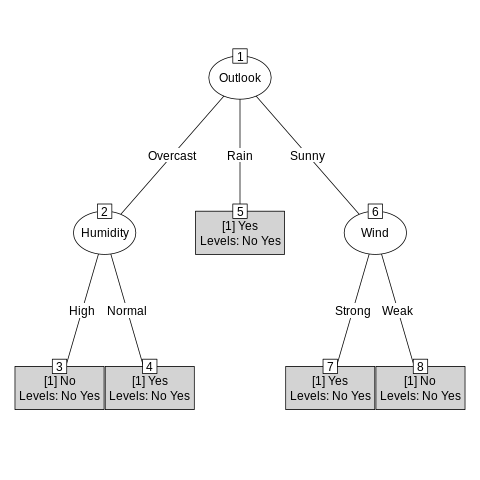

In [14]:
%%R
# Visualize the Decision Tree with partykit
as.party.J48 <- function(model) {
  tree <- model$tree
  party_tree <- function(node, id = 1) {
    if (is.null(node$children)) {
      return(partynode(id = as.integer(id), info = node$class))
    }
    kids <- list()
    for (val in names(node$children)) {
      kids[[val]] <- party_tree(node$children[[val]], paste(id, val, sep = "."))
    }
    split <- partysplit(varid = which(model$predictors == node$feature),
                        breaks = NULL, index = seq_along(kids),
                        info = node$feature)
    return(partynode(id = as.integer(id), split = split, kids = kids))
  }
  return(party(party_tree(tree), data = model$data))
}
plot(as.party.J48(model))

## Summary and Conclusion

C4.5 is a robust and interpretable decision tree algorithm that improves on ID3 by using the gain ratio, handling continuous features, managing missing values, and applying pruning. While it has been largely superseded by ensemble methods in high-performance applications, it remains a foundational algorithm in machine learning, valued for its simplicity and clarity. In R, the `RWeka` package provides an easy way to implement C4.5 through the `J48` function, allowing users to build, visualize, and evaluate decision trees effectively. This tutorial show a brief overview of the C4.5 algorithm, its implementation in R, and how to use it for classification tasks.


## References

1.  R. Quinlan (1993). C4.5: Programs for Machine Learning. Morgan Kaufmann Publishers, San Mateo, CA.

2.  Witten, I. H., Frank, E., & Hall, M. A. (2016). Data Mining: Practical Machine Learning Tools and Techniques (4th ed.). Morgan Kaufmann.

3.  Hornik, K., Buchta, C., & Zeileis, A. (2009). Open-Source Machine Learning: R Meets Weka. Computational Statistics, 24(2), 225–232

4.  Kuhn, M., & Quinlan, R. (2023). C50: C5.0 Decision Trees and Rule-Based Models. CRAN. Official C50 package documentation: CRAN C50.